In [49]:
import pandas as pd 
import csv
from psycopg2 import sql, connect
import seaborn as sns
import matplotlib.pyplot as plt 


In [50]:
con = connect(database='crime', user= 'postgres', password='admin')
cur = con.cursor()
q = sql.SQL("SELECT * FROM offenceDetails;")
cur.execute(q)
r = cur.fetchall()

c = [d[0] for d in cur.description]

df = pd.DataFrame(r, columns=c)

df.head()

            

,financialyear,financialquarter,forcename,offencedescription,offencegroup,offencesubgroup,offencecode,numberofoffences
0,2012/13,1,Action Fraud,Fraud offences recorded by Action Fraud,Fraud offences,Fraud: Action Fraud,AF,20323
1,2012/13,1,Avon and Somerset,Abandoning child under two years (outcomes only),Violence against the person,Violence without injury,12,0
2,2012/13,1,Avon and Somerset,Absconding from lawful custody,Miscellaneous crimes against society,Miscellaneous crimes against society,80,1
3,2012/13,1,Avon and Somerset,Abuse of children through prostitution and por...,Sexual offences,Other sexual offences,71,0
4,2012/13,1,Avon and Somerset,Abuse of position of trust of a sexual nature,Sexual offences,Other sexual offences,73,3


In [51]:
import pandas as pd


# Perform the equivalent of SQL query using pandas
result_df = df[
    (df['forcename'] == 'Action Fraud') &
    (df['offencegroup'] == 'Fraud offences')
].groupby(['financialyear', 'financialquarter']).agg({'numberofoffences': 'sum'}).reset_index()

# Sort the result DataFrame
result_df = result_df.sort_values(by=['financialyear', 'financialquarter'])

# Print or use the result DataFrame
print(result_df)


   financialyear  financialquarter  numberofoffences
0        2012/13                 1             20323
1        2012/13                 2             25754
2        2012/13                 3             27464
3        2012/13                 4             43861
4        2013/14                 1             54377
5        2013/14                 2             54232
6        2013/14                 3             49746
7        2013/14                 4             52866
8        2014/15                 1             52517
9        2014/15                 2             57039
10       2014/15                 3             62238
11       2014/15                 4             58529
12       2015/16                 1             59475
13       2015/16                 2             54204
14       2015/16                 3             51927
15       2015/16                 4             55032
16       2016/17                 1             61375
17       2016/17                 2            

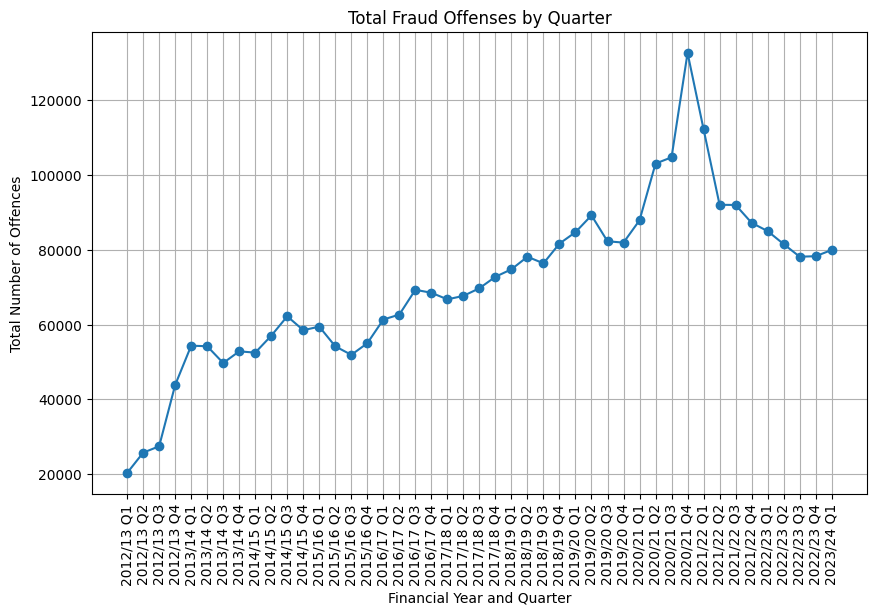

In [52]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(result_df['financialyear'] + ' Q' + result_df['financialquarter'].astype(str),
         result_df['numberofoffences'], marker='o', linestyle='-')
plt.title('Total Fraud Offenses by Quarter')
plt.xlabel('Financial Year and Quarter')
plt.ylabel('Total Number of Offences')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [59]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [60]:
spark = SparkSession.builder.appName('Data').getOrCreate()
file = 'data.csv'
df = spark.read.csv(file, header=True, inferSchema=True)
df.show()



ConnectionRefusedError: [WinError 10061] No connection could be made because the target machine actively refused it